<h1 color=#2ECC71> EDA </h1>

In [1]:
#preprocess stage 
#import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#read all datafiles
data_2015 = pd.read_csv("../Data/2015.csv")
data_2016 = pd.read_csv("../Data/2016.csv")
data_2017 = pd.read_csv("../Data/2017.csv")
data_2018 = pd.read_csv("../Data/2018.csv")
data_2019 = pd.read_csv("../Data/2019.csv") 


In [112]:
data_2015.name_ = "data_2015"
data_2016.name_ = "data_2016"
data_2017.name_ = "data_2017"
data_2018.name_ = "data_2018"
data_2019.name_ = "data_2019"

In [113]:
#create a list with the dataframes to iterate after that
datalist = [data_2015, data_2016, data_2017, data_2018, data_2019]

### find for column amount


In [114]:
ycounter =  0
for i in datalist:
    print(f"{2015+ycounter} {i.shape}")
    ycounter +=1 

2015 (158, 12)
2016 (157, 13)
2017 (155, 12)
2018 (156, 9)
2019 (156, 9)


#### We can see that the diferents files have diferent columns amounts 

In [115]:
ycounter = 0 
for i in datalist:
    print(f"{2015+ycounter} {i.columns}")
    ycounter +=1

2015 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
2016 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
2017 Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
2018 Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expe

In [116]:
columnsset = {"empty"}

In [117]:
for i in datalist:
    for j in i.keys():
        columnsset.add(j)
#create a set with the name of the columns 

In [118]:
print(columnsset)

{'Score', 'Happiness Rank', 'Economy (GDP per Capita)', 'Freedom', 'Trust..Government.Corruption.', 'Standard Error', 'Happiness.Rank', 'empty', 'Generosity', 'Whisker.low', 'Health..Life.Expectancy.', 'Happiness Score', 'Trust (Government Corruption)', 'Lower Confidence Interval', 'Healthy life expectancy', 'Health (Life Expectancy)', 'Whisker.high', 'Perceptions of corruption', 'Overall rank', 'Dystopia.Residual', 'Freedom to make life choices', 'Social support', 'Region', 'Dystopia Residual', 'Country or region', 'Country', 'Upper Confidence Interval', 'Happiness.Score', 'Family', 'GDP per capita', 'Economy..GDP.per.Capita.'}


In [119]:
columnsset.discard("empty")#delete the empty element

In [120]:
len(columnsset)
#we see that we have 30 diferents columns in the set of datasets

30

In [121]:
data_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [122]:
data_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


#### Compare the dataset with more atributes with the dataset with less atributes

---

---

### First We will check the state of the data in each dataset

---

---

In [123]:
data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

/tmp/ipykernel_1336/3926700399.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(best_ten.Country, rotation=90)


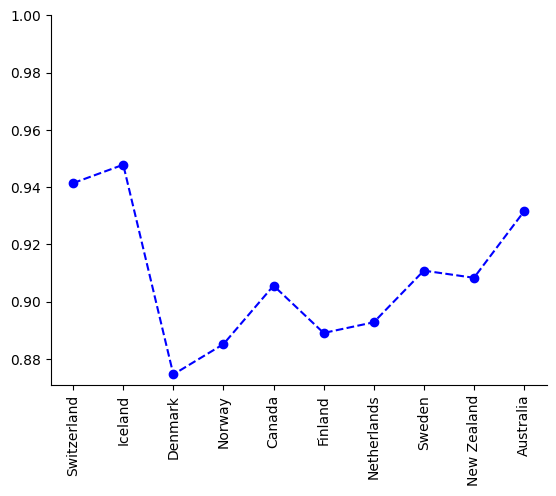

In [3]:
best_ten = data_2015[data_2015["Happiness Rank"] < 11]
fig, ax = plt.subplots()
ax.plot(best_ten.Country, best_ten['Health (Life Expectancy)'], "bo--")
ax.spines["top"].set_color("None")
ax.spines["right"].set_color("None")
ax.set_xticklabels(best_ten.Country, rotation=90)
ax.set_ylim(top=1)
plt.show()

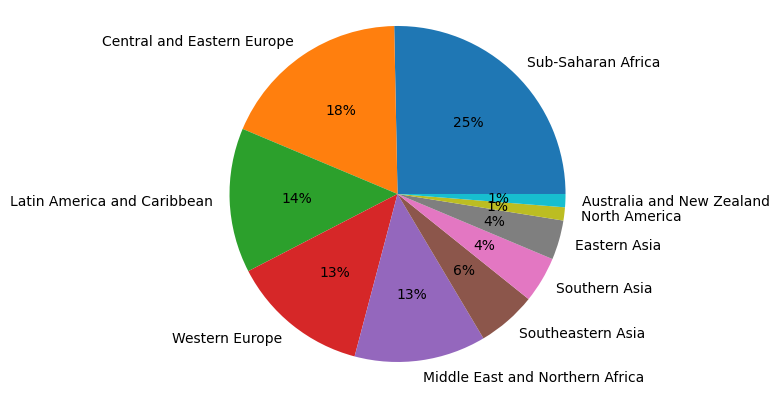

In [7]:
fig, ax = plt.subplots()
ax.pie(data_2015.Region.value_counts(),labels=data_2015.Region.value_counts().keys(),autopct=lambda p: '{:.0f}%'.format(p))
ax.axis("equal")
#ax.legend(loc="best")
plt.show()

In [124]:
data_2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


#### we can see that
- happiness rank have the values min and max in the correct range
- the hapiness score don't have outliers values like over 10 and lees than 1 
- in GDP we have some weird values like 0
- in life ecpectancy have weird values like 0 
- freedom weird min value 
- trust weird min value 
- Generosity weird min value

In [125]:
data_2015.describe(include="object")
# we see that the most amount of registers are in the region of Sub-Saharan Africa

,Country,Region
count,158,158
unique,158,10
top,Switzerland,Sub-Saharan Africa
freq,1,40


In [126]:
#check for the register with have the weird values 
data_2015[(data_2015["Economy (GDP per Capita)"]==0) | 
          (data_2015["Family"]==0) | 
          (data_2015["Health (Life Expectancy)"]==0) | 
          (data_2015["Freedom"]==0) | 
          (data_2015["Trust (Government Corruption)"]==0) |
          (data_2017["Generosity"]==0)]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
73,Indonesia,Southeastern Asia,74,5.399,0.02596,0.82827,1.08708,0.63793,0.46611,0.00000,0.51535,1.86399
86,Serbia,Central and Eastern Europe,87,5.123,0.04864,0.92053,1.00964,0.74836,0.20107,0.02617,0.19231,2.02500
111,Iraq,Middle East and Northern Africa,112,4.677,0.05232,0.98549,0.81889,0.60237,0.00000,0.13788,0.17922,1.95335
119,Congo (Kinshasa),Sub-Saharan Africa,120,4.517,0.03680,0.00000,1.00120,0.09806,0.22605,0.07625,0.24834,2.86712
122,Sierra Leone,Sub-Saharan Africa,123,4.507,0.07068,0.33024,0.95571,0.00000,0.40840,0.08786,0.21488,2.51009
147,Central African Republic,Sub-Saharan Africa,148,3.678,0.06112,0.07850,0.00000,0.06699,0.48879,0.08289,0.23835,2.72230


#### we see that are diferents countries with this weird values but they have the other values then i think i dont delete this register at the moment

In [127]:
data_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [128]:
data_2015["Happiness Rank"].duplicated().value_counts()

Happiness Rank
False    157
True       1
Name: count, dtype: int64

In [129]:
data_2015[data_2015["Happiness Rank"].duplicated()]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
82,Montenegro,Central and Eastern Europe,82,5.192,0.05235,0.97438,0.90557,0.72521,0.1826,0.14296,0.1614,2.10017


In [130]:
data_2015[data_2015["Happiness Rank"]==82]
#we can have ties in this dataset

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
81,Jordan,Middle East and Northern Africa,82,5.192,0.04524,0.90198,1.05392,0.69639,0.40661,0.14293,0.11053,1.87996
82,Montenegro,Central and Eastern Europe,82,5.192,0.05235,0.97438,0.90557,0.72521,0.18260,0.14296,0.16140,2.10017


In [131]:
data_2015[data_2015["Country"].duplicated()]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


#### we dont have duplicateds countries in 2015

In [132]:
for i in datalist:
    try:
        print(i[i["Country"].duplicated()])
    except Exception as err:
        print(f"in {i.name_} : don't have the column\n {err}")

Empty DataFrame
Columns: [Country, Region, Happiness Rank, Happiness Score, Standard Error, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, Dystopia Residual]
Index: []
Empty DataFrame
Columns: [Country, Region, Happiness Rank, Happiness Score, Lower Confidence Interval, Upper Confidence Interval, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, Dystopia Residual]
Index: []
Empty DataFrame
Columns: [Country, Happiness.Rank, Happiness.Score, Whisker.high, Whisker.low, Economy..GDP.per.Capita., Family, Health..Life.Expectancy., Freedom, Generosity, Trust..Government.Corruption., Dystopia.Residual]
Index: []
in data_2018 : don't have the column
 'Country'
in data_2019 : don't have the column
 'Country'


#### We see here that the dataframes it does not have repeated countries 

---

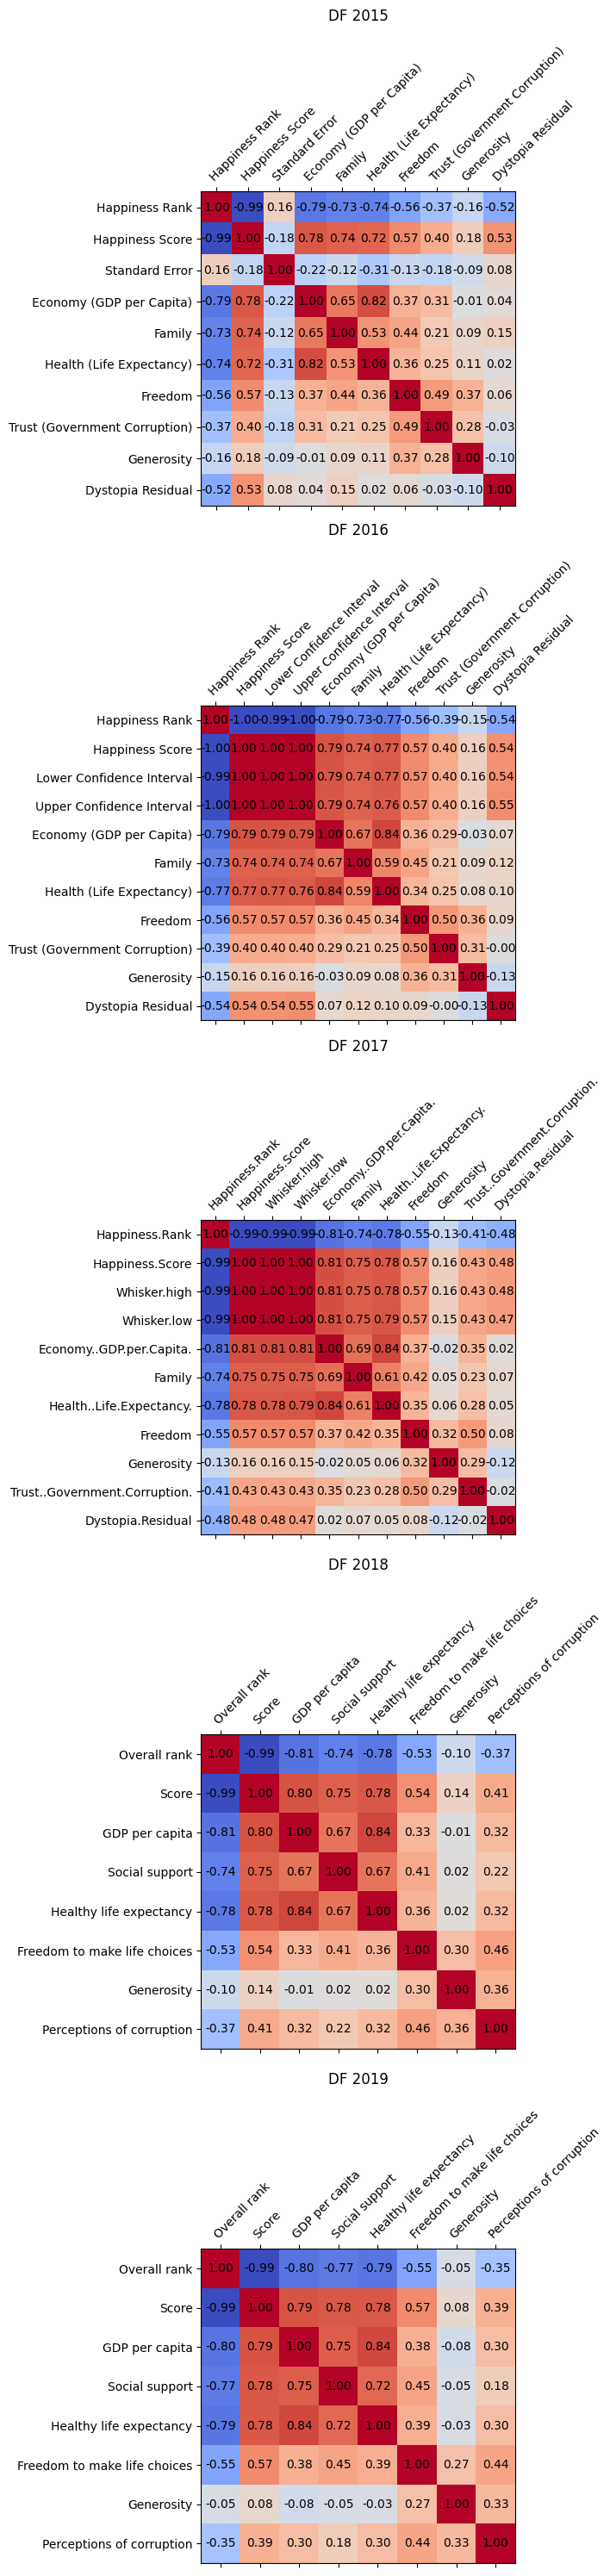

In [133]:
# Create the subplots 
fig, axes = plt.subplots(5, 1, figsize=(30, 30))  # 1 row 5 columns

# Iterar sobre cada DataFrame y su correspondiente axis
for i, (df, ax) in enumerate(zip(datalist, axes)):
    df = df.select_dtypes(include=[np.number])
    corr = df.corr()
    cax = ax.matshow(corr, cmap='coolwarm')
    ax.set_title(f'DF {i+2015}', pad=20)


    ax.set_xticks(np.arange(len(corr.columns)))
    ax.set_yticks(np.arange(len(corr.columns)))
    ax.set_xticklabels(corr.columns)
    ax.set_yticklabels(corr.columns)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="left", rotation_mode="anchor")

    # Añadir los valores de la correlación en el gráfico
    for (j, k), val in np.ndenumerate(corr):
        ax.text(k, j, f'{val:.2f}', ha='center', va='center', color='black')


plt.tight_layout()
plt.show()

#### We see that the numeric columns are not the same and some atrubutes are very correlation

---

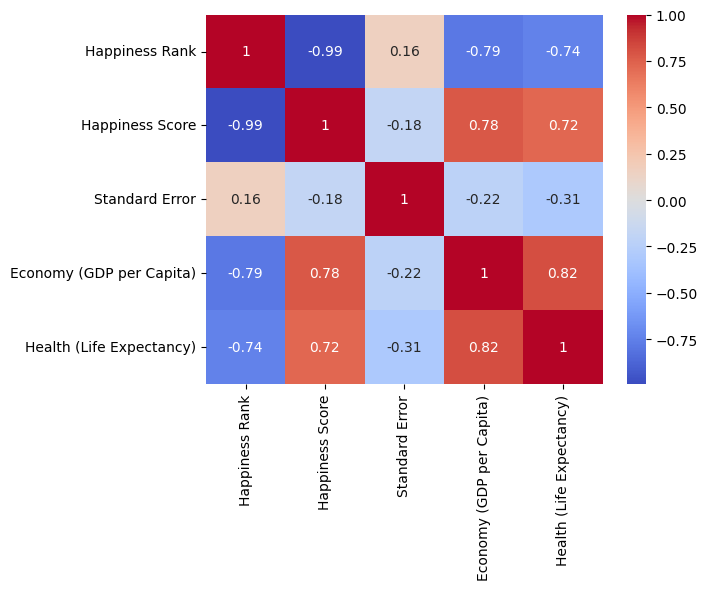

In [134]:
corr = data_2015[["Happiness Rank", "Happiness Score", "Standard Error", "Economy (GDP per Capita)", "Health (Life Expectancy)"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

---

#### Looking with the correlation map we see that the columns for the model to predict the score are the next ones

- GDP
- Family
- Life Expectancy
- Freedom
- Trust


In [135]:
# create the dictionary with its respective region to place the attribute in all the datasets
regions = list(data_2015["Region"].values)

In [136]:
Region = {}
for  i in regions:
        countries = list(data_2015["Country"][data_2015["Region"] == i].values)
        Region[i] = countries
        


In [137]:
Region.keys()

dict_keys(['Western Europe', 'North America', 'Australia and New Zealand', 'Middle East and Northern Africa', 'Latin America and Caribbean', 'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia', 'Sub-Saharan Africa', 'Southern Asia'])

In [138]:
Region_number = {list(Region.keys())[i]:i for i in range(len(Region.keys()))}

In [139]:
Region_number

{'Western Europe': 0,
 'North America': 1,
 'Australia and New Zealand': 2,
 'Middle East and Northern Africa': 3,
 'Latin America and Caribbean': 4,
 'Southeastern Asia': 5,
 'Central and Eastern Europe': 6,
 'Eastern Asia': 7,
 'Sub-Saharan Africa': 8,
 'Southern Asia': 9}

In [140]:
def get_region(row):
    for i in list(Region.keys()):
        if row in Region[i]:
            region = i
            return  i

In [141]:
def change_region_value(row):
     for key, value in Region_number.items():
        if row == key:
            return value

In [142]:
#add one county what are not in the list
Region["Sub-Saharan Africa"].append("South Sudan")

In [143]:
data_2019.iloc[155]

Overall rank                            156
Country or region               South Sudan
Score                                 2.853
GDP per capita                        0.306
Social support                        0.575
Healthy life expectancy               0.295
Freedom to make life choices           0.01
Generosity                            0.202
Perceptions of corruption             0.091
Name: 155, dtype: object

In [144]:
for i in datalist:
    if "Country or region"  in list(i.keys()):
        i["Region"] = i["Country or region"].apply(get_region)
    if "Region" not in list(i.keys()):
        i["Region"] = i["Country"].apply(get_region)

In [145]:
data_2019.keys()

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Region'],
      dtype='object')

In [146]:
data_2019[["Region","Country or region"]]

,Region,Country or region
0,Western Europe,Finland
1,Western Europe,Denmark
2,Western Europe,Norway
3,Western Europe,Iceland
4,Western Europe,Netherlands
...,...,...
151,Sub-Saharan Africa,Rwanda
152,Sub-Saharan Africa,Tanzania
153,Southern Asia,Afghanistan
154,Sub-Saharan Africa,Central African Republic


In [147]:
data_test = data_2019["Region"].apply(change_region_value)

In [148]:
data_test

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
151    8.0
152    8.0
153    9.0
154    8.0
155    8.0
Name: Region, Length: 156, dtype: float64

#### How we can see we dont have nulls here 

In [149]:
Region_number

{'Western Europe': 0,
 'North America': 1,
 'Australia and New Zealand': 2,
 'Middle East and Northern Africa': 3,
 'Latin America and Caribbean': 4,
 'Southeastern Asia': 5,
 'Central and Eastern Europe': 6,
 'Eastern Asia': 7,
 'Sub-Saharan Africa': 8,
 'Southern Asia': 9}

In [150]:
data_test.value_counts()

Region
8.0    37
6.0    28
0.0    20
4.0    20
3.0    19
5.0     9
9.0     7
7.0     6
2.0     2
1.0     2
Name: count, dtype: int64

## ok 👌

In [151]:
#Transfotmation of the names of columns
# Found the diferents forms to name this columns

columnsdict = {"GDP":["Economy (GDP per Capita)", "Economy..GDP.per.Capita.", "GDP per capita"],
               "Family":["Family", "Social support"],
               "Life Expectancy":["Health (Life Expectancy)", "Health..Life.Expectancy.", "Healthy life expectancy"],
               "Freedom":["Freedom", "Freedom to make life choices"],
               "Trust": ["Trust (Government Corruption)", "Trust..Government.Corruption.", "Perceptions of corruption"],
               "Rank":["Overall rank", "Happiness.Rank", "Happiness Rank"],
               "Country":["Country", "Country or region"],
               "Score":["Happiness Score", "Happiness.Score", "Score"]}

In [152]:
# function to change the names

def change_names(df:pd.DataFrame) ->pd.DataFrame:
    keys = df.keys()
    gdp = ""
    family = ""
    life_expectancy = ""
    freedom = ""
    trust = ""
    rank = ""
    country = ""
    score = ""
    for i in keys:
        if i in columnsdict["GDP"]:
            gdp = i
            continue
        if i in columnsdict["Family"]:
            family = i
            continue
        if i in columnsdict["Life Expectancy"]:
            life_expectancy = i
        if i in columnsdict["Freedom"]:
            freedom = i
            continue
        if i in columnsdict["Trust"]:
            trust = i
            continue
        if i in columnsdict["Rank"]:
            rank = i
            continue
        if i in columnsdict["Country"]:
            country = i
            continue
        if i in columnsdict["Score"]:
            score = i
            continue
    if gdp != ""and family!="" and life_expectancy!="" and freedom!="" and trust!="" and rank!="" and country!="" and score !="":

        df2 = df[[gdp, family,life_expectancy ,freedom ,trust, score, "Region"]].copy()
        df2.rename(columns={gdp:'GDP',
                            family:"Family",
                            life_expectancy:"Life Expectancy",
                            freedom:"Freedom",
                            rank:"Rank",
                            country:"Country",
                            trust:"Trust",
                            score:"Score",
                            "Region":"Region"}, inplace=True)
        return df2
    else:
        print(f"{gdp,family,life_expectancy,freedom,trust,rank,country}", df.name_)

In [153]:
for i in datalist:
    print(f"{i.name_} : {i.keys()}")

data_2015 : Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
data_2016 : Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
data_2017 : Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Region'],
      dtype='object')
data_2018 : Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
     

In [154]:
for index in range(len(datalist)):
    datalist[index] = change_names(datalist[index])


In [155]:
for i in datalist:
    print(i.keys())
    

Index(['GDP', 'Family', 'Life Expectancy', 'Freedom', 'Trust', 'Score',
       'Region'],
      dtype='object')
Index(['GDP', 'Family', 'Life Expectancy', 'Freedom', 'Trust', 'Score',
       'Region'],
      dtype='object')
Index(['GDP', 'Family', 'Life Expectancy', 'Freedom', 'Trust', 'Score',
       'Region'],
      dtype='object')
Index(['GDP', 'Family', 'Life Expectancy', 'Freedom', 'Trust', 'Score',
       'Region'],
      dtype='object')
Index(['GDP', 'Family', 'Life Expectancy', 'Freedom', 'Trust', 'Score',
       'Region'],
      dtype='object')


## 👌

In [156]:
data_2015.keys()

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [157]:
data_2017.keys()

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Region'],
      dtype='object')

In [158]:
datalist = [data_2015, data_2016, data_2017, data_2018, data_2019]

for index, df in enumerate(datalist):
    datalist[index] = change_names(df)
    if index == 0:
        data_2015 = datalist[index]
    elif index == 1:
        data_2016 = datalist[index]
    elif index == 2:
        data_2017 = datalist[index]
    elif index == 3:
        data_2018 = datalist[index]
    elif index == 4:
        data_2019 = datalist[index]

print(data_2015.keys())
print(data_2016.keys())
print(data_2017.keys())


Index(['GDP', 'Family', 'Life Expectancy', 'Freedom', 'Trust', 'Score',
       'Region'],
      dtype='object')
Index(['GDP', 'Family', 'Life Expectancy', 'Freedom', 'Trust', 'Score',
       'Region'],
      dtype='object')
Index(['GDP', 'Family', 'Life Expectancy', 'Freedom', 'Trust', 'Score',
       'Region'],
      dtype='object')


In [159]:
data_2015["Region"] = data_2015["Region"].apply(change_region_value)
data_2016["Region"] = data_2016["Region"].apply(change_region_value)
data_2017["Region"] = data_2017["Region"].apply(change_region_value)
data_2018["Region"] = data_2018["Region"].apply(change_region_value)
data_2019["Region"] = data_2019["Region"].apply(change_region_value)


In [160]:
data_2019.head()

,GDP,Family,Life Expectancy,Freedom,Trust,Score,Region
0,1.340,1.587,0.986,0.596,0.393,7.769,0.0
1,1.383,1.573,0.996,0.592,0.410,7.600,0.0
2,1.488,1.582,1.028,0.603,0.341,7.554,0.0
3,1.380,1.624,1.026,0.591,0.118,7.494,0.0
4,1.396,1.522,0.999,0.557,0.298,7.488,0.0


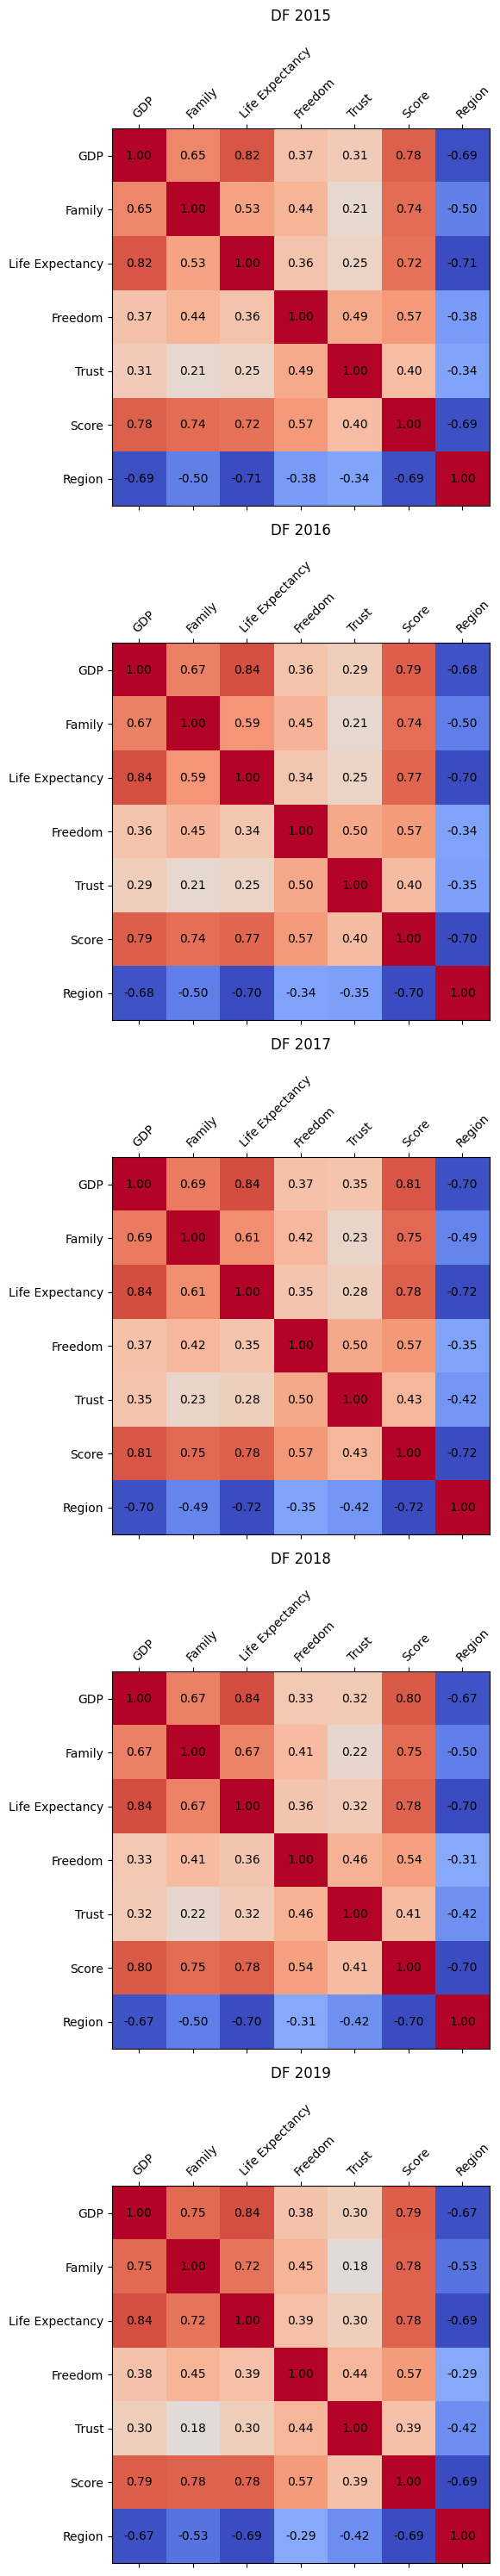

In [161]:
# Create the subplots 
fig, axes = plt.subplots(5, 1, figsize=(30, 30))  # 1 row 5 columns

# Iterar sobre cada DataFrame y su correspondiente axis
for i, (df, ax) in enumerate(zip(datalist, axes)):
    df = df.select_dtypes(include=[np.number])
    corr = df.corr()
    cax = ax.matshow(corr, cmap='coolwarm')
    ax.set_title(f'DF {i+2015}', pad=20)

    # Configurar los ejes
    ax.set_xticks(np.arange(len(corr.columns)))
    ax.set_yticks(np.arange(len(corr.columns)))
    ax.set_xticklabels(corr.columns)
    ax.set_yticklabels(corr.columns)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="left", rotation_mode="anchor")

    # Añadir los valores de la correlación en el gráfico
    for (j, k), val in np.ndenumerate(corr):
        ax.text(k, j, f'{val:.2f}', ha='center', va='center', color='black')

# Añadir la barra de colores a la derecha de todos los subplots

plt.tight_layout()
plt.show()

### after this transformation i see that on this form the region dont have a good correlation with the variable to find

In [162]:
#save the data for the model training
data_2015.to_csv(f"../Data/Train/data_2015.csv", index=False)
data_2016.to_csv(f"../Data/Train/data_2016.csv", index=False)
data_2017.to_csv(f"../Data/Train/data_2017.csv", index=False)
data_2018.to_csv(f"../Data/Train/data_2018.csv", index=False)
data_2019.to_csv(f"../Data/Train/data_2019.csv", index=False)

In [163]:
df_concatenate = pd.concat([data_2015, data_2016, data_2017, data_2018, data_2019])
df_concatenate.to_csv("../Data/Train/df.csv", index=False)